## Африка и Кризисы##

Внимательно прочитайте предлагаемую документацию (https://pandas.pydata.org/, https://scikit-learn.org/stable/), постройте требуемый классификатор и ответьте на два вопроса (включая код).
В ответ пришлите ссылку на репозиторий с выполненной работой.

https://www.kaggle.com/chirin/africa-economic-banking..

Постройте модель, которая оценивает вероятность того, что в следующем году в африканской стране Ivory Coast произойдет кризис на базе 6летней истории (наличие кризиса, информация о валюте и внешнем долге).

В какой африканской стране кризисы происходят чаще?

1) Импортируем нужные библиотеки

In [30]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn

2) Открываем датасет

In [31]:
data = pd.read_csv("african_crises.csv")
data

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


3) Посмотрев на датасет анализируем значение колонок

case - A number which denotes a specific country

cc3A - three letter country code

country - The name of the country

year - The year of the observation

systemic_crisis - "0" means that no systemic crisis occurred in the year and "1" means that a systemic crisis occurred in the year.

exch_usd - The exchange rate of the country vis-a-vis the USD

domestic_debt_in_default - "0" means that no sovereign domestic debt default occurred in the year and "1" means that a sovereign domestic debt default occurred in the year

sovereign_external_debt_default - "0" means that no sovereign external debt default occurred in the year and "1" means that a sovereign external debt default occurred in the year

gdp_weighted_default - The total debt in default vis-a-vis the GDP

inflation_annual_cpi - The annual CPI Inflation rate

independence - "0" means "no independence" and "1" means "independence"

currency_crises - "0" means that no currency crisis occurred in the year and "1" means that a currency crisis occurred in the year

inflation_crises - "0" means that no inflation crisis occurred in the year and "1" means that an inflation crisis occurred in the year

banking_crisis - "no_crisis" means that no banking crisis occurred in the year and "crisis" means that a banking crisis occurred in the year

Оставляем нужную страну для анализа

In [32]:
Ivory_Coast = data[data["country"] == "Ivory Coast"]
Ivory_Coast

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
220,15,CIV,Ivory Coast,1952,0,0.0,0,0,0.0,16.216100,0,0,0,no_crisis
221,15,CIV,Ivory Coast,1953,0,0.0,0,0,0.0,2.326185,0,0,0,no_crisis
222,15,CIV,Ivory Coast,1954,0,0.0,0,0,0.0,-2.273304,0,0,0,no_crisis
223,15,CIV,Ivory Coast,1955,0,0.0,0,0,0.0,2.326185,0,0,0,no_crisis
224,15,CIV,Ivory Coast,1956,0,0.0,0,0,0.0,4.544795,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,15,CIV,Ivory Coast,2010,0,0.0,0,1,0.0,1.800000,1,0,0,no_crisis
279,15,CIV,Ivory Coast,2011,0,0.0,0,1,0.0,4.448000,1,0,0,no_crisis
280,15,CIV,Ivory Coast,2012,0,0.0,0,1,0.0,1.300000,1,0,0,no_crisis
281,15,CIV,Ivory Coast,2013,0,0.0,0,0,0.0,2.584000,1,0,0,no_crisis


Смотрим кризисы. Заметим, что корреляция наблюдается между уровнем инфляции и наличием инфляционного  криза в определенный год

In [33]:
Ivory_Coast[Ivory_Coast["banking_crisis"] == "crisis"]

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
256,15,CIV,Ivory Coast,1988,1,310.0,0,1,0.0,6.935,1,0,0,crisis
257,15,CIV,Ivory Coast,1989,1,305.0,0,1,0.0,0.986,1,0,0,crisis
258,15,CIV,Ivory Coast,1990,1,267.0,0,1,0.0,-0.658,1,0,0,crisis
259,15,CIV,Ivory Coast,1991,1,265.0,0,1,0.0,1.575,1,0,0,crisis


In [34]:
Ivory_Coast[Ivory_Coast["inflation_crises"] == True]

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
226,15,CIV,Ivory Coast,1958,0,0.0,0,0,0.0,21.154761,0,0,1,no_crisis
245,15,CIV,Ivory Coast,1977,0,236.0,0,0,0.0,24.482437,1,0,1,no_crisis
247,15,CIV,Ivory Coast,1979,0,205.0,0,0,0.0,21.759545,1,0,1,no_crisis
262,15,CIV,Ivory Coast,1994,0,540.0,0,1,0.0,25.956000,1,1,1,no_crisis


In [35]:
Ivory_Coast[Ivory_Coast["currency_crises"] == True]

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
262,15,CIV,Ivory Coast,1994,0,540.0,0,1,0.0,25.956,1,1,1,no_crisis


In [36]:
Ivory_Coast[Ivory_Coast["systemic_crisis"] == True]

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
256,15,CIV,Ivory Coast,1988,1,310.0,0,1,0.0,6.935,1,0,0,crisis
257,15,CIV,Ivory Coast,1989,1,305.0,0,1,0.0,0.986,1,0,0,crisis
258,15,CIV,Ivory Coast,1990,1,267.0,0,1,0.0,-0.658,1,0,0,crisis
259,15,CIV,Ivory Coast,1991,1,265.0,0,1,0.0,1.575,1,0,0,crisis


Создадим модель логистической регрессии
x - возможные значение уровня инфляции
y - 0 - кризиса нет 1 - кризис есть

In [37]:
model = LogisticRegression(solver = 'liblinear')

In [38]:
x = np.array(Ivory_Coast["inflation_annual_cpi"]).reshape((-1, 1))
x

array([[16.21609969],
       [ 2.32618535],
       [-2.27330409],
       [ 2.32618535],
       [ 4.54479533],
       [13.04340287],
       [21.15476063],
       [ 6.34828189],
       [-2.15248345],
       [14.43033046],
       [-0.1775689 ],
       [ 8.71954922],
       [-3.16904495],
       [ 1.75752869],
       [ 4.66509829],
       [ 2.76618654],
       [ 7.74759562],
       [ 2.50292738],
       [ 8.07511689],
       [-1.07225635],
       [ 1.19461542],
       [12.9325741 ],
       [18.22418299],
       [10.61769304],
       [12.90885269],
       [24.48243736],
       [16.03173523],
       [21.75954473],
       [ 8.81      ],
       [ 8.682     ],
       [ 7.389     ],
       [ 5.879     ],
       [ 4.281     ],
       [ 1.753     ],
       [ 6.837     ],
       [ 6.978     ],
       [ 6.935     ],
       [ 0.986     ],
       [-0.658     ],
       [ 1.575     ],
       [ 4.218     ],
       [ 2.13      ],
       [25.956     ],
       [14.1       ],
       [ 2.7       ],
       [ 6

In [39]:
y = np.array(Ivory_Coast["inflation_crises"])
y

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

Обучаем

смотрим коэффициент детерминации

и точность модели

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [41]:
r_sq = model.score(x, y)
r_sq

0.9682539682539683

In [42]:
prediction = model.predict(x_test)
accuracy_score(prediction,y_test)

1.0

In [43]:
s = data.iloc[:, [2,12]]
second = s[s["inflation_crises"] == True]

In [44]:
second

,country,inflation_crises
7,Algeria,1
16,Algeria,1
18,Algeria,1
19,Algeria,1
20,Algeria,1
...,...,...
1049,Zimbabwe,1
1050,Zimbabwe,1
1051,Zimbabwe,1
1052,Zimbabwe,1


вторая задача: считаем, сколько раз за данный период в каждой стране был кризис
вывод: в Анголе

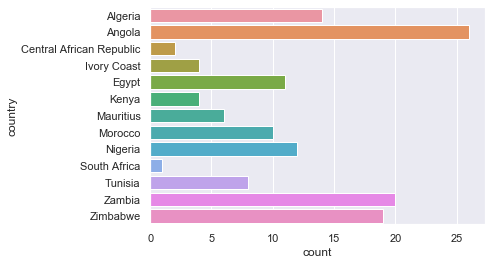

In [45]:
seaborn.set(style="darkgrid")
a = seaborn.countplot(y = "country", data = second)